# Sample SVM Code

Sample data set is the iris data

1. Linear kernel

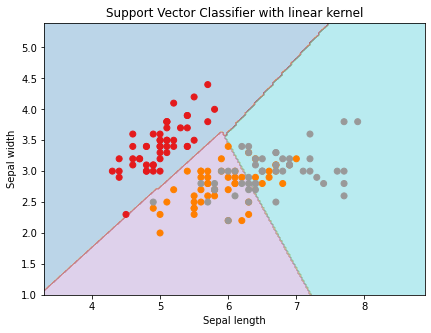

In [3]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

C = 1.0

Svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)
Z = Svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

plt.show()


2. RBF Kernel

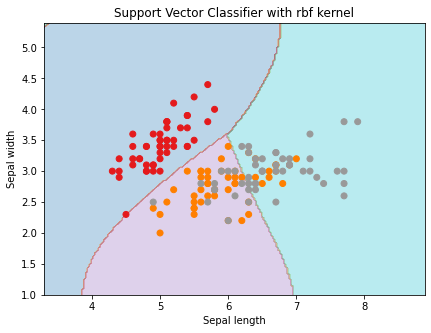

In [4]:
Svc_classifier = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(X, y)
Z = Svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')
plt.show()


3. Polynomial Kernel

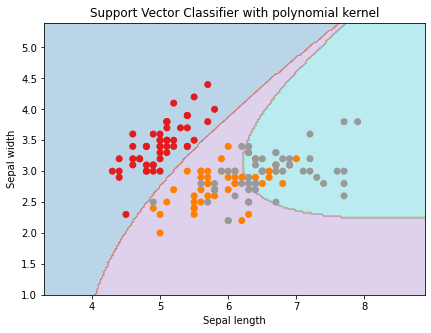

In [10]:
Svc_classifier = svm.SVC(kernel='poly', gamma='auto', C=C).fit(X, y)
Z = Svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with polynomial kernel')
plt.show()


4. Sigmoid Kernel

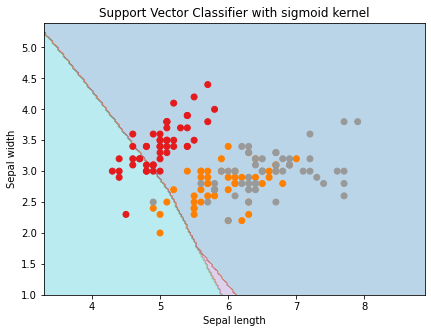

In [8]:
Svc_classifier = svm.SVC(kernel='sigmoid', gamma='scale', C=C).fit(X, y)
Z = Svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with sigmoid kernel')
plt.show()


Sample Hyperparameter tuning using GridSearchCV. Tuning parameters for C, gamma, degree, and kernel. (CAUTION: this takes several minutes even on the small sample dataset)

In [15]:

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [2, 3, 4],
              'kernel': ['rbf', 'poly', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X, y)



In [14]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 1000, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, degree=2, gamma=0.1)
